# The Effects of the Coronavirus on the NYC Taxi Industry

The goal of this project is to answer a number of questions about the effects of the coronavirus on travel by taxi in NYC.

# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
import warnings

warnings.filterwarnings("ignore")

In [ ]:
taxi_2019 = pd.read_csv('C:\\Users\\15164\\Desktop\\nyc-taxis-vs-covid\\data\\taxi_2019.csv')
taxi_2020 = pd.read_csv('C:\\Users\\15164\\Desktop\\nyc-taxis-vs-covid\\data\\taxi_2020.csv')

In [3]:
taxi_2019.head(2)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
0,2019-03-22 08:22:39,2019-03-22 08:32:50,1.0,1.45,170,107,1.0,8.5,2.95,0.0,14.75,Friday,Murray Hill-Queens,Gravesend
1,2019-03-21 15:31:46,2019-03-21 15:55:19,1.0,2.00,186,163,1.0,15.0,1.50,0.0,20.80,Thursday,Port Richmond,Midtown South


In [4]:
taxi_2020.head(2)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
0,2020-03-08 00:00:33,2020-03-08 00:11:14,2.0,1.06,148,4,1.0,8.0,2.36,0.0,14.16,Sunday,Madison,Arden Heights
1,2020-03-08 00:02:10,2020-03-08 00:06:24,1.0,0.73,74,41,2.0,5.0,0.00,0.0,6.30,Sunday,East Harlem South,Central Harlem North


# Question 1:
The first questions this analysis will answer are the following:

**1-** What was the most expensive trip before the pandemic and between what zones did it occur? 

**2-** What was the least expensive trip before the pandemic and where did it occur?

**3-** Conversely, what were the most and least expensive trips during the pandemic and between which zones did they occur?

### 1- What was the most expensive trip before the pandemic and between what zones?

In [5]:
most_expensive = taxi_2019.sort_values('total_amount', ascending=False)

In [6]:
most_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
2014869,2019-03-15 19:00:45,2019-03-15 19:12:48,1.0,0.0,233,79,3.0,943274.8,141492.02,0.0,1084772.17,Friday,Union Sq,East Williamsburg


As we can see above, according to our data **the most expensive trip in 2019 occured on March 15th and was for a total amount of a whopping $1,084,772.17. It was between Union Square and East Williamsburg.**

It's however important to note that while this trip was recorded **it was not paid for**: according to our data dictionary, the payment_type '3.0' means that there was no charge. So while I will keep note of what the most expensive record is, I'd prefer to see what the most expensive trip **paid** for was. I will select the payment types of 1.0 and 2.0, since according to the dictionary these are for card and cash, respectively.

In [13]:
most_expensive = most_expensive.loc[most_expensive['PULocationID'] != most_expensive['DOLocationID']]
most_expensive = most_expensive.loc[most_expensive['payment_type'].isin([1.0, 2.0])]
most_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
26087240,2019-06-24 10:57:02,2019-06-24 11:10:43,1.0,0.0,229,43,2.0,346949.99,0.0,0.0,347035.05,Monday,Times Sq/Theatre District,Charleston/Tottenville


These results show the following: **the most expensive paid trip was for $347,035.05 and was between Times Square and Charleston/Tottenville. It lasted for about 13 minutes and was paid in cash.**

### 2 - What was the least expensive trip before the pandemic and where did it occur?

To answer this question, I'll first select the trips that have a total amount greater than $0.00 because anything less most likely means that no actual trip was taken or they may have been an error in the data entry.

Then I'll sort my data in order from lowest 'total_amount' to highest and display the lowest entry only.

In [8]:
least_expensive = taxi_2019.loc[taxi_2019['total_amount'] > 0]

In [9]:
least_expensive = least_expensive.sort_values('total_amount', ascending=True)

In [10]:
least_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
24063600,2019-06-15 08:54:15,2019-06-15 08:54:59,1.0,0.0,236,236,2.0,0.01,0.0,0.0,0.01,Saturday,Upper East Side South,Upper East Side South


According to this, the least expensive trip was **$0.01 and occured within one zone only, the Upper East Side South**. When examining the pickup and drop off times, I notice that there is only a 44 second difference between these two which tells me that while the meter was started, there most likely was no trip taken; the rider (or driver) probably changed his/her mind before taking off.

In theory, this answer could answer our question. However, since the question is "what is the least expensive ***trip***, and barely a trip was actually taken, I've decided to define what a trip actually means by again filtering my data to reflect only the trips that have different pick up and drop off locations:

In [12]:
least_expensive = least_expensive.loc[least_expensive['PULocationID'] != least_expensive['DOLocationID']]

In [13]:
least_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
3304069,2019-03-21 05:21:43,2019-03-21 05:22:44,1.0,0.0,181,25,2.0,0.01,0.0,0.0,0.01,Thursday,Parkchester,Borough Park


And now we have a more appropriate answer to our question, which is: the cheapest trip occured on March 21, 2019, lasted for a minute and one second, and **cost a mere $0.01. It occured between the two zones of Parkchester and Borough Park.**

### 3- What are the most and least expensive trips to occur during the pandemic?

#### Most expensive:

In [3]:
most_expensive = taxi_2020.sort_values('total_amount', ascending=False)

In [17]:
most_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
366384,2020-03-10 09:58:11,2020-03-10 10:09:46,1.0,0.0,193,193,2.0,2.5,0.0,0.0,1000003.8,Tuesday,Randalls Island,Randalls Island


As seen above, the most expensive trip during the peak of the pandemic was for **$1,000,003.8 and though it lasted for 11 minutes, was in one zone only, Randalls Island.**

I will also have a look at the most expensive trip with a different pick up and drop off location:

In [5]:
most_expensive2 = most_expensive.loc[most_expensive['PULocationID'] != most_expensive['DOLocationID']]
most_expensive2 = most_expensive2.loc[most_expensive2['payment_type'].isin([1.0, 2.0])]
most_expensive2.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
9202389,2020-12-20 23:01:34,2020-12-20 23:14:21,1.0,4.51,249,50,1.0,6964.0,1393.56,0.0,8361.36,Sunday,Westchester Village/Unionport,Co-Op City


**The most expensive trip with a drop off location different from the pickup location was for $8361.36 and was between Westchester Village/Unionport and Co-Op City.** It lasted for just under 15 minutes.

#### Least Expensive:

In [7]:
least_expensive = taxi_2020.loc[taxi_2020['total_amount'] > 0]
least_expensive = least_expensive.sort_values('total_amount', ascending=True)
least_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
2806051,2020-07-17 21:38:05,2020-07-17 21:39:40,1.0,0.0,229,229,3.0,0.11,0.0,0.0,0.11,Friday,Times Sq/Theatre District,Times Sq/Theatre District


Again, the least expensive trip occured within **one zone only, Times Sq/Theatre District, and was $0.11**. While this trip lasted just over a minute, there most likely was no trip taken again; the rider (or driver) probably changed his/her mind before taking off.

So again, I will find the least expensive ***paid*** trip with different pick up and drop off locations:

In [8]:
least_expensive = least_expensive.loc[least_expensive['PULocationID'] != least_expensive['DOLocationID']]
least_expensive = least_expensive.loc[least_expensive['payment_type'].isin([1.0, 2.0])]
least_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
290897,2020-03-09 18:34:01,2020-03-09 19:31:29,2.0,17.4,43,132,2.0,0.0,0.0,0.0,0.3,Monday,Charleston/Tottenville,Kensington


**The cheapest trip occured on March 20th, 2020, lasted for an hour, and cost a mere $0.30. It occured between the two zones of Charleston/Tottenville and Kensington and was paid in cash.** 

### Are there any major differences between pre-pandemic and peak pandemic most and least expensive trips?

While there was some difference between the most expensive trips of 2019 and 2020: **338,673.69 dollars**  between the most expensive and **$0.29** between the cheapest, there isn't enough information to effectively determine if whether or not COVID-19 influenced these specific charges or not. Additionally, while it is possible these high fares are accurate, it is also likely that there could be an error in these figures and thus, another reason why it is not possible to surely decide that the coronavirus affected these specific trips.

# Question 3:
**1-** What is the most popular payment method?

**2-** Did the pandemic affect the payment methods?

In [23]:
payment_type_count = taxi_2020['payment_type'].value_counts()
payment_types = pd.DataFrame(payment_type_count)
#Rename the columns
payment_types.reset_index(inplace=True)
payment_types = payment_types.rename(columns = {'index':'Payment Type', 'payment_type':'Count'})
payment_types.head(6)

,Payment Type,Count
0,1.0,6842002
1,2.0,2671626
2,3.0,69552
3,4.0,40787
4,5.0,1


Now that we have the counts of each, I will convert the codes into the actual names of the payment types. According to our data dictionary the following is true:

**1= Credit card** | **2= Cash** | **3= No charge** | **4= Dispute** | **5= Unknown** | **6= Voided trip**

In [28]:
payment_types['Payment Type']= payment_types['Payment Type'].astype(str)

In [29]:
payment_types['Payment Type']= payment_types['Payment Type'].replace({'1.0': 'CreditCard', '2.0': 'Cash',
                                                                      '3.0': 'NoCharge','4.0': 'Dispute', 
                                                                      '5.0': 'Unknown', '6.0': 'VoidedTrip'})
payment_types.head()

,Payment Type,Count
0,CreditCard,6842002
1,Cash,2671626
2,NoCharge,69552
3,Dispute,40787
4,Unknown,1


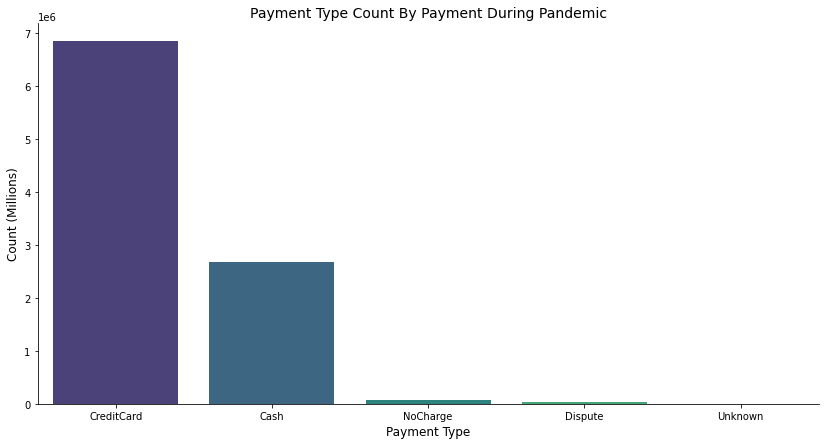

In [31]:
plt.figure(figsize=(14,7))
ax1 = sns.barplot(x=payment_types['Payment Type'], y=payment_types['Count'], palette='viridis')
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count (Millions)', fontsize=12)
plt.title('Payment Type Count By Payment During Pandemic', fontsize=14);
sns.despine()
plt.show()

To answer our first question: **Credit Cards have been the most popular payment method during the pandemic.**  It seems as if that is because of the general fear of germs spreading associated with exchanging money, so I will explore if the same held true  before the pandemic.

In [32]:
payment_type_count = taxi_2019['payment_type'].value_counts()
payment_types_pre = pd.DataFrame(payment_type_count)
#Rename the columns
payment_types_pre.reset_index(inplace=True)
payment_types_pre = payment_types_pre.rename(columns = {'index':'Payment Type', 'payment_type':'Count'})
payment_types_pre.head(6)

NameError: name 'taxi_2019' is not defined